In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
import datetime as dt

import plotly.graph_objects as go
import plotly.express as px

from itertools import cycle
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import metrics
%matplotlib inline

In [ ]:
!pip install yfinance

In [ ]:
#ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import yfinance as yf
# Dataset for Training
dataset_train = yf.download('^BSESN', start='2018-03-31', end='2022-03-31')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
dataset_train.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-04-02,33030.871094,33289.339844,32997.878906,33255.359375,33255.359375,7600
2018-04-03,33197.421875,33402.941406,33153.828125,33370.628906,33370.628906,11100
2018-04-04,33437.519531,33505.531250,32972.558594,33019.070312,33019.070312,9700
2018-04-05,33289.960938,33637.460938,33267.859375,33596.800781,33596.800781,11000
2018-04-06,33608.589844,33697.511719,33501.371094,33626.968750,33626.968750,10800


In [ ]:
dataset_train.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-24,57190.050781,57827.988281,57138.511719,57595.679688,57595.679688,51400
2022-03-25,57801.718750,57845.371094,57100.238281,57362.199219,57362.199219,6900
2022-03-28,57472.718750,57638.339844,56825.089844,57593.488281,57593.488281,6300
2022-03-29,57814.761719,58001.531250,57639.351562,57943.648438,57943.648438,12100
2022-03-30,58362.851562,58727.781250,58176.000000,58683.988281,58683.988281,6300


In [ ]:
train = dataset_train.reset_index() # Set Index to Column

In [ ]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-04-02,33030.871094,33289.339844,32997.878906,33255.359375,33255.359375,7600
1,2018-04-03,33197.421875,33402.941406,33153.828125,33370.628906,33370.628906,11100
2,2018-04-04,33437.519531,33505.531250,32972.558594,33019.070312,33019.070312,9700
3,2018-04-05,33289.960938,33637.460938,33267.859375,33596.800781,33596.800781,11000
4,2018-04-06,33608.589844,33697.511719,33501.371094,33626.968750,33626.968750,10800


In [ ]:
# Drop the Adj Close columm

train = train.drop(['Adj Close'], axis=1)
train.head()

,Date,Open,High,Low,Close,Volume
0,2018-04-02,33030.871094,33289.339844,32997.878906,33255.359375,7600
1,2018-04-03,33197.421875,33402.941406,33153.828125,33370.628906,11100
2,2018-04-04,33437.519531,33505.531250,32972.558594,33019.070312,9700
3,2018-04-05,33289.960938,33637.460938,33267.859375,33596.800781,11000
4,2018-04-06,33608.589844,33697.511719,33501.371094,33626.968750,10800


In [ ]:
print("Null values:", train.isnull().values.sum())
print("NA values:", train.isna().values.any())

Null values: 0
NA values: False


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    983 non-null    datetime64[ns]
 1   Open    983 non-null    float64       
 2   High    983 non-null    float64       
 3   Low     983 non-null    float64       
 4   Close   983 non-null    float64       
 5   Volume  983 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 46.2 KB


In [ ]:
comp_opclo= train.groupby(train['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
comp_opclo = comp_opclo.reindex(new_order, axis=0)
comp_opclo

,Open,Close
Date,,
January,46141.792783,46027.403506
February,46572.738932,46539.615735
March,44214.084668,44147.147144
April,38216.689605,38201.240691
May,38637.245713,38563.824290
June,40522.089309,40491.829660
July,41051.427712,40990.715634
August,42269.166463,42259.577701
September,43408.450684,43315.606494


In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=comp_opclo.index,
    y=comp_opclo['Open'],
    name='Stock Open Price',
    marker_color='#0b1d78'
))
fig.add_trace(go.Bar(
    x=comp_opclo.index,
    y=comp_opclo['Close'],
    name='Stock Close Price',
    marker_color='#1fe074'
))

fig.update_layout(barmode='group', xaxis_tickangle=-90,
                  title='Comparision Between Stock Open and Close price')
fig.show()

In [ ]:
comp_hilo= train.groupby(train['Date'].dt.strftime('%B'))[['High','Low']].mean()
comp_hilo = comp_hilo.reindex(new_order, axis=0)
comp_hilo


,High,Low
Date,,
January,46311.736328,45763.411086
February,46859.711488,46212.246845
March,44613.022656,43635.267969
April,38471.067395,37912.720855
May,38845.883551,38329.302425
June,40726.249442,40249.079822
July,41194.579003,40799.165774
August,42460.663780,42020.847845
September,43603.550537,43058.078564


In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=comp_hilo.index,
    y=comp_hilo['High'],
    name='Stock High Price',
    marker_color='#0b1d78'
))
fig.add_trace(go.Bar(
    x=comp_hilo.index,
    y=comp_hilo['Low'],
    name='Stock Low Price',
    marker_color='#1fe074'
))

fig.update_layout(barmode='group', xaxis_tickangle=-90,
                  title='Comparision Between Stock High and Low Price')
fig.show()


In [ ]:
names = cycle(['Open Price','Close Price','High Price','Low Price'])

fig = px.line(train, x=train.Date, y=[train['Open'], train['Close'],
                                          train['High'], train['Low']],
             labels={'date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [ ]:
train_set = train.iloc[:, 1:2].values

In [ ]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0,1))
train_set_scaled = sc.fit_transform(train_set)

In [ ]:
X_train = []
y_train = []
for i in range(60, 983):
    X_train.append(train_set_scaled[i-60:i, 0])
    y_train.append(train_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

print(X_train.shape)
print(y_train.shape)

(923, 60)
(923,)


In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(923, 60, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

In [ ]:
lstm_model = Sequential()

lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
lstm_model.add(Dropout(0.2))

lstm_model.add(LSTM(units=50,return_sequences=True))
lstm_model.add(Dropout(0.2))

lstm_model.add(LSTM(units=50,return_sequences=True))
lstm_model.add(Dropout(0.2))

lstm_model.add(LSTM(units=50))
lstm_model.add(Dropout(0.2))

lstm_model.add(Dense(units=1))

In [ ]:
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout_4 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_5 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_6 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_6 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_7 (LSTM)               (None, 50)               

In [ ]:
lstm_model.compile(optimizer='adam',loss='mean_squared_error')

lstm_model.fit(X_train,y_train,epochs=100,batch_size=50)

Epoch 1/100
19/19 [==============================] - 11s 140ms/step - loss: 0.0643
Epoch 2/100
19/19 [==============================] - 4s 193ms/step - loss: 0.0110
Epoch 3/100
19/19 [==============================] - 3s 134ms/step - loss: 0.0073
Epoch 4/100
19/19 [==============================] - 3s 136ms/step - loss: 0.0058
Epoch 5/100
19/19 [==============================] - 3s 137ms/step - loss: 0.0051
Epoch 6/100
19/19 [==============================] - 3s 145ms/step - loss: 0.0055
Epoch 7/100
19/19 [==============================] - 6s 315ms/step - loss: 0.0054
Epoch 8/100
19/19 [==============================] - 4s 217ms/step - loss: 0.0045
Epoch 9/100
19/19 [==============================] - 3s 142ms/step - loss: 0.0048
Epoch 10/100
19/19 [==============================] - 4s 190ms/step - loss: 0.0049
Epoch 11/100
19/19 [==============================] - 3s 140ms/step - loss: 0.0046
Epoch 12/100
19/19 [==============================] - 3s 136ms/step - loss: 0.0044
Epoch 13/100

In [ ]:
dataset_test = yf.download('^BSESN', start='2021-04-01', end='2022-03-31')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
dataset_test.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-04-01,49868.531250,50092.480469,49478.531250,50029.828125,50029.828125,8500
2021-04-05,50020.910156,50028.671875,48580.800781,49159.320312,49159.320312,12700
2021-04-06,49441.128906,49582.261719,48936.351562,49201.390625,49201.390625,9600
2021-04-07,49277.089844,49900.128906,49093.898438,49661.761719,49661.761719,9800
2021-04-08,49885.261719,50118.078125,49581.609375,49746.210938,49746.210938,21800


In [ ]:
dataset_test.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-24,57190.050781,57827.988281,57138.511719,57595.679688,57595.679688,51400
2022-03-25,57801.718750,57845.371094,57100.238281,57362.199219,57362.199219,6900
2022-03-28,57472.718750,57638.339844,56825.089844,57593.488281,57593.488281,6300
2022-03-29,57814.761719,58001.531250,57639.351562,57943.648438,57943.648438,12100
2022-03-30,58362.851562,58727.781250,58176.000000,58683.988281,58683.988281,6300


In [ ]:
test = dataset_test.reset_index() # Set Index to Column

In [ ]:
test = test.drop(['Adj Close'], axis=1)
test.head()

,Date,Open,High,Low,Close,Volume
0,2021-04-01,49868.531250,50092.480469,49478.531250,50029.828125,8500
1,2021-04-05,50020.910156,50028.671875,48580.800781,49159.320312,12700
2,2021-04-06,49441.128906,49582.261719,48936.351562,49201.390625,9600
3,2021-04-07,49277.089844,49900.128906,49093.898438,49661.761719,9800
4,2021-04-08,49885.261719,50118.078125,49581.609375,49746.210938,21800


In [ ]:
test_set = test.iloc[:, 1:2].values

In [ ]:
# Prepping the input for the model
dataset_total = pd.concat((train['Open'], test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 300):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
predicted_bse_stock_price = lstm_model.predict(X_test)
predicted_bse_stock_price = sc.inverse_transform(predicted_bse_stock_price)

8/8 [==============================] - 2s 32ms/step


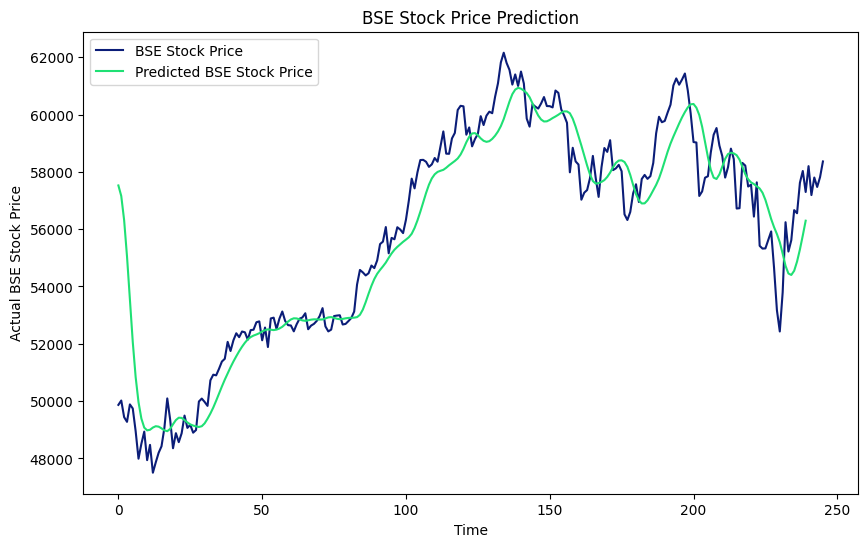

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(test_set, color = '#0b1d78', label = 'BSE Stock Price')
plt.plot(predicted_bse_stock_price, color = '#1fe074', label = 'Predicted BSE Stock Price')
plt.title('BSE Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual BSE Stock Price')
plt.legend()
plt.show()